In [1]:
# imports

import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn import datasets, metrics 
from sklearn.linear_model import LinearRegression, LogisticRegression
from sklearn.model_selection import train_test_split, KFold, LeaveOneOut, cross_val_score
from sklearn.preprocessing import StandardScaler, PolynomialFeatures

import statsmodels.api as sm

### Reading in cleaned datasets

In [2]:
pwd

'/Users/emilynaftalin/Data_Science/General Assembly/dsi/projects/project_2/code'

In [3]:
ames = pd.read_pickle('../data/ames_clean.pkl')
ames_test = pd.read_pickle('../data/ames_test_clean.pkl')

In [4]:
ames.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Yr Sold,Sale Type,SalePrice,has_garage,garage_attached,garage_large,garage_nice,garage_RFn,garage_Unf,has_fireplace
0,109,533352170,60,RL,69.048866,13517,Pave,NaN,IR1,Lvl,...,2010,WD,130500,1.0,1.0,1.0,0.0,1,0,0
1,544,531379050,60,RL,43.000000,11492,Pave,NaN,IR1,Lvl,...,2009,WD,220000,1.0,1.0,1.0,0.0,1,0,1
2,153,535304180,20,RL,68.000000,7922,Pave,NaN,Reg,Lvl,...,2010,WD,109000,1.0,0.0,0.0,0.0,0,1,0
3,318,916386060,60,RL,73.000000,9802,Pave,NaN,Reg,Lvl,...,2010,WD,174000,1.0,1.0,1.0,0.0,0,0,0
4,255,906425045,50,RL,82.000000,14235,Pave,NaN,IR1,Lvl,...,2010,WD,138500,1.0,0.0,1.0,0.0,0,1,0


In [5]:
ames_test.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Mo Sold,Yr Sold,Sale Type,has_garage,garage_attached,garage_large,garage_nice,garage_RFn,garage_Unf,has_fireplace
0,2658,902301120,190,RM,69.000000,9142,Pave,Grvl,Reg,Lvl,...,4,2006,WD,1.0,0.0,0.0,NaN,0,1,0
1,2718,905108090,90,RL,69.545961,9662,Pave,NaN,IR1,Lvl,...,8,2006,WD,1.0,1.0,1.0,NaN,0,0,0
2,2414,528218130,60,RL,58.000000,17104,Pave,NaN,IR1,Lvl,...,9,2006,New,1.0,1.0,1.0,NaN,1,0,1
3,1989,902207150,30,RM,60.000000,8520,Pave,NaN,Reg,Lvl,...,7,2007,WD,1.0,0.0,1.0,NaN,0,1,0
4,625,535105100,20,RL,69.545961,9500,Pave,NaN,IR1,Lvl,...,7,2009,WD,1.0,1.0,1.0,NaN,1,0,1


### Basic EDA 

_Some repeated from [data_cleaning_preprocessing notebook](/code/data_clean_preprocessing.ipynb)_

In [6]:
ames.corr()

,Id,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Mo Sold,Yr Sold,SalePrice,has_garage,garage_attached,garage_large,garage_nice,garage_RFn,garage_Unf,has_fireplace
Id,1.000000,0.175536,0.026354,-0.022524,0.032901,-0.061306,-0.026189,-0.063862,-0.090562,-0.035154,...,0.128269,-0.975764,-0.051360,-0.034501,-0.038488,-0.043425,0.032476,-0.030165,0.049362,-0.030321
PID,0.175536,1.000000,-0.003365,-0.083948,0.024526,-0.265056,0.106123,-0.346259,-0.176452,-0.246246,...,-0.031774,0.008698,-0.254465,-0.138836,-0.281432,-0.203212,0.016342,-0.209699,0.249169,-0.165127
MS SubClass,0.026354,-0.003365,1.000000,-0.363916,-0.245794,0.035285,-0.069696,0.035899,0.044089,-0.004195,...,0.012869,-0.032720,-0.087881,-0.115157,-0.112163,0.034608,0.013036,-0.056692,-0.023910,-0.044426
Lot Frontage,-0.022524,-0.083948,-0.363916,1.000000,0.390141,0.183383,-0.050554,0.104691,0.081280,0.200435,...,-0.015986,0.008027,0.326930,0.085354,0.279807,0.197340,0.004627,0.098773,-0.164676,0.202965
Lot Area,0.032901,0.024526,-0.245794,0.390141,1.000000,0.105408,-0.018777,0.035663,0.050381,0.168573,...,0.002872,-0.029452,0.296312,0.086083,0.197212,0.179447,0.036435,0.013405,-0.059573,0.203882
Overall Qual,-0.061306,-0.265056,0.035285,0.183383,0.105408,1.000000,-0.081771,0.602635,0.584594,0.435729,...,0.018232,-0.011689,0.800028,0.247221,0.455911,0.486371,0.056828,0.210728,-0.429843,0.433870
Overall Cond,-0.026189,0.106123,-0.069696,-0.050554,-0.018777,-0.081771,1.000000,-0.370603,0.043564,-0.135131,...,-0.002405,0.047696,-0.096209,0.033730,-0.164416,-0.179634,0.073043,-0.081436,0.212724,-0.034372
Year Built,-0.063862,-0.346259,0.035899,0.104691,0.035663,0.602635,-0.370603,1.000000,0.629989,0.327284,...,-0.008355,-0.003958,0.571726,0.231036,0.584006,0.533579,-0.033648,0.298344,-0.521294,0.237679
Year Remod/Add,-0.090562,-0.176452,0.044089,0.081280,0.050381,0.584594,0.043564,0.629989,1.000000,0.210269,...,0.011343,0.043120,0.550142,0.131640,0.369444,0.446074,0.006435,0.199999,-0.418660,0.200212
Mas Vnr Area,-0.035154,-0.246246,-0.004195,0.200435,0.168573,0.435729,-0.135131,0.327284,0.210269,1.000000,...,-0.002015,-0.018770,0.508444,0.113744,0.228004,0.238045,-0.001142,0.119231,-0.231247,0.273598


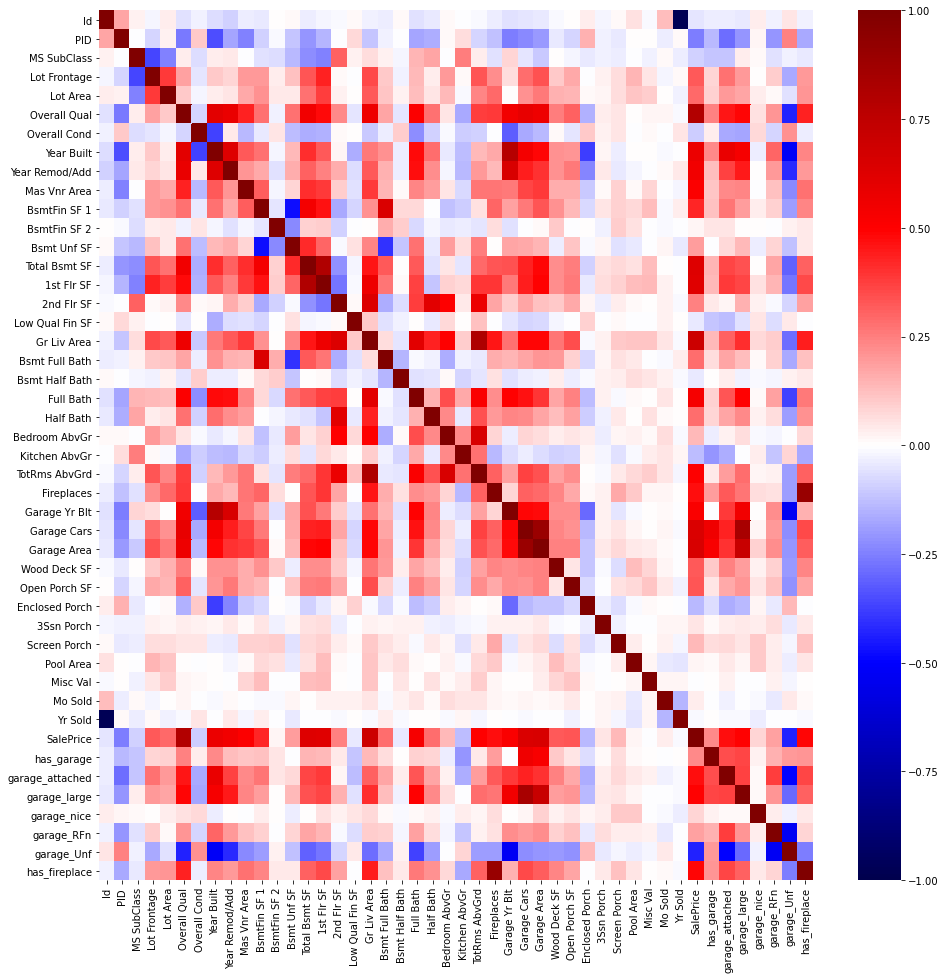

In [7]:
# giant heatmap to start visualizing correlations
plt.figure(figsize=(16,16))
sns.heatmap(ames.corr(), vmin=-1, vmax=1, cmap='seismic');

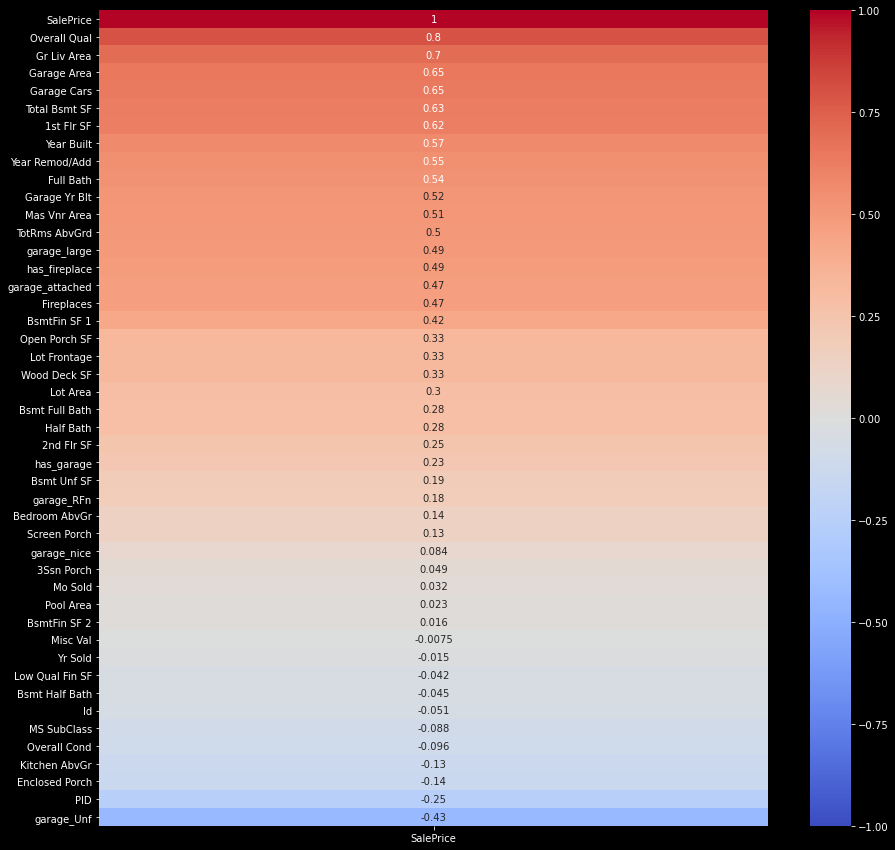

In [8]:
# Credit to John D Hazard for helping me make a more visually-pleasing heatmap 

plt.style.use('dark_background')  #dark background - easier to see
fig, ax = plt.subplots(figsize=(15, 15))  # make it larger!
plt.fontsize = 27                           # make the font more readable 
sns.heatmap(ames.corr()[['SalePrice']].sort_values('SalePrice', ascending = False),   
            annot = True, cmap = 'coolwarm', vmin = -1, vmax = 1);       # only care about correlation to Saleprice, so only mapping on that! 

In [9]:
# these columns are numeric columns

ames.describe().columns

Index(['Id', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice',
       'has_garage', 'garage_attached', 'garage_large', 'garage_nice',
       'garage_RFn', 'garage_Unf', 'has_fireplace'],
      dtype='object')

In [10]:
ames.head()

,Id,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Yr Sold,Sale Type,SalePrice,has_garage,garage_attached,garage_large,garage_nice,garage_RFn,garage_Unf,has_fireplace
0,109,533352170,60,RL,69.048866,13517,Pave,NaN,IR1,Lvl,...,2010,WD,130500,1.0,1.0,1.0,0.0,1,0,0
1,544,531379050,60,RL,43.000000,11492,Pave,NaN,IR1,Lvl,...,2009,WD,220000,1.0,1.0,1.0,0.0,1,0,1
2,153,535304180,20,RL,68.000000,7922,Pave,NaN,Reg,Lvl,...,2010,WD,109000,1.0,0.0,0.0,0.0,0,1,0
3,318,916386060,60,RL,73.000000,9802,Pave,NaN,Reg,Lvl,...,2010,WD,174000,1.0,1.0,1.0,0.0,0,0,0
4,255,906425045,50,RL,82.000000,14235,Pave,NaN,IR1,Lvl,...,2010,WD,138500,1.0,0.0,1.0,0.0,0,1,0


In [11]:
# turning numerical columns into a variable
num_cols = ames.describe().columns
num_cols

Index(['Id', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual',
       'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area',
       'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath',
       'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces',
       'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice',
       'has_garage', 'garage_attached', 'garage_large', 'garage_nice',
       'garage_RFn', 'garage_Unf', 'has_fireplace'],
      dtype='object')

In [12]:
continuous_cols = ['Lot Area', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Gr Liv Area','Garage Yr Blt', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'SalePrice']

In [13]:
# These are discrete variables
discrete_cols = [x for x in num_cols if x not in continuous_cols]
discrete_cols

['Id',
 'PID',
 'MS SubClass',
 'Lot Frontage',
 'Overall Qual',
 'Overall Cond',
 'Low Qual Fin SF',
 'Bsmt Full Bath',
 'Bsmt Half Bath',
 'Full Bath',
 'Half Bath',
 'Bedroom AbvGr',
 'Kitchen AbvGr',
 'TotRms AbvGrd',
 'Fireplaces',
 'Garage Cars',
 'Mo Sold',
 'Yr Sold',
 'has_garage',
 'garage_attached',
 'garage_large',
 'garage_nice',
 'garage_RFn',
 'garage_Unf',
 'has_fireplace']

In [14]:
# building pairplot using numeric columns from above 

xvars = ['Lot Frontage', 'Lot Area', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area',
       'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF',
       '1st Flr SF', '2nd Flr SF', 'Gr Liv Area','SalePrice']

yvars = ['Garage Yr Blt', 'Garage Area', 'Wood Deck SF',
       'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch',
       'Pool Area', 'Misc Val', 'SalePrice']

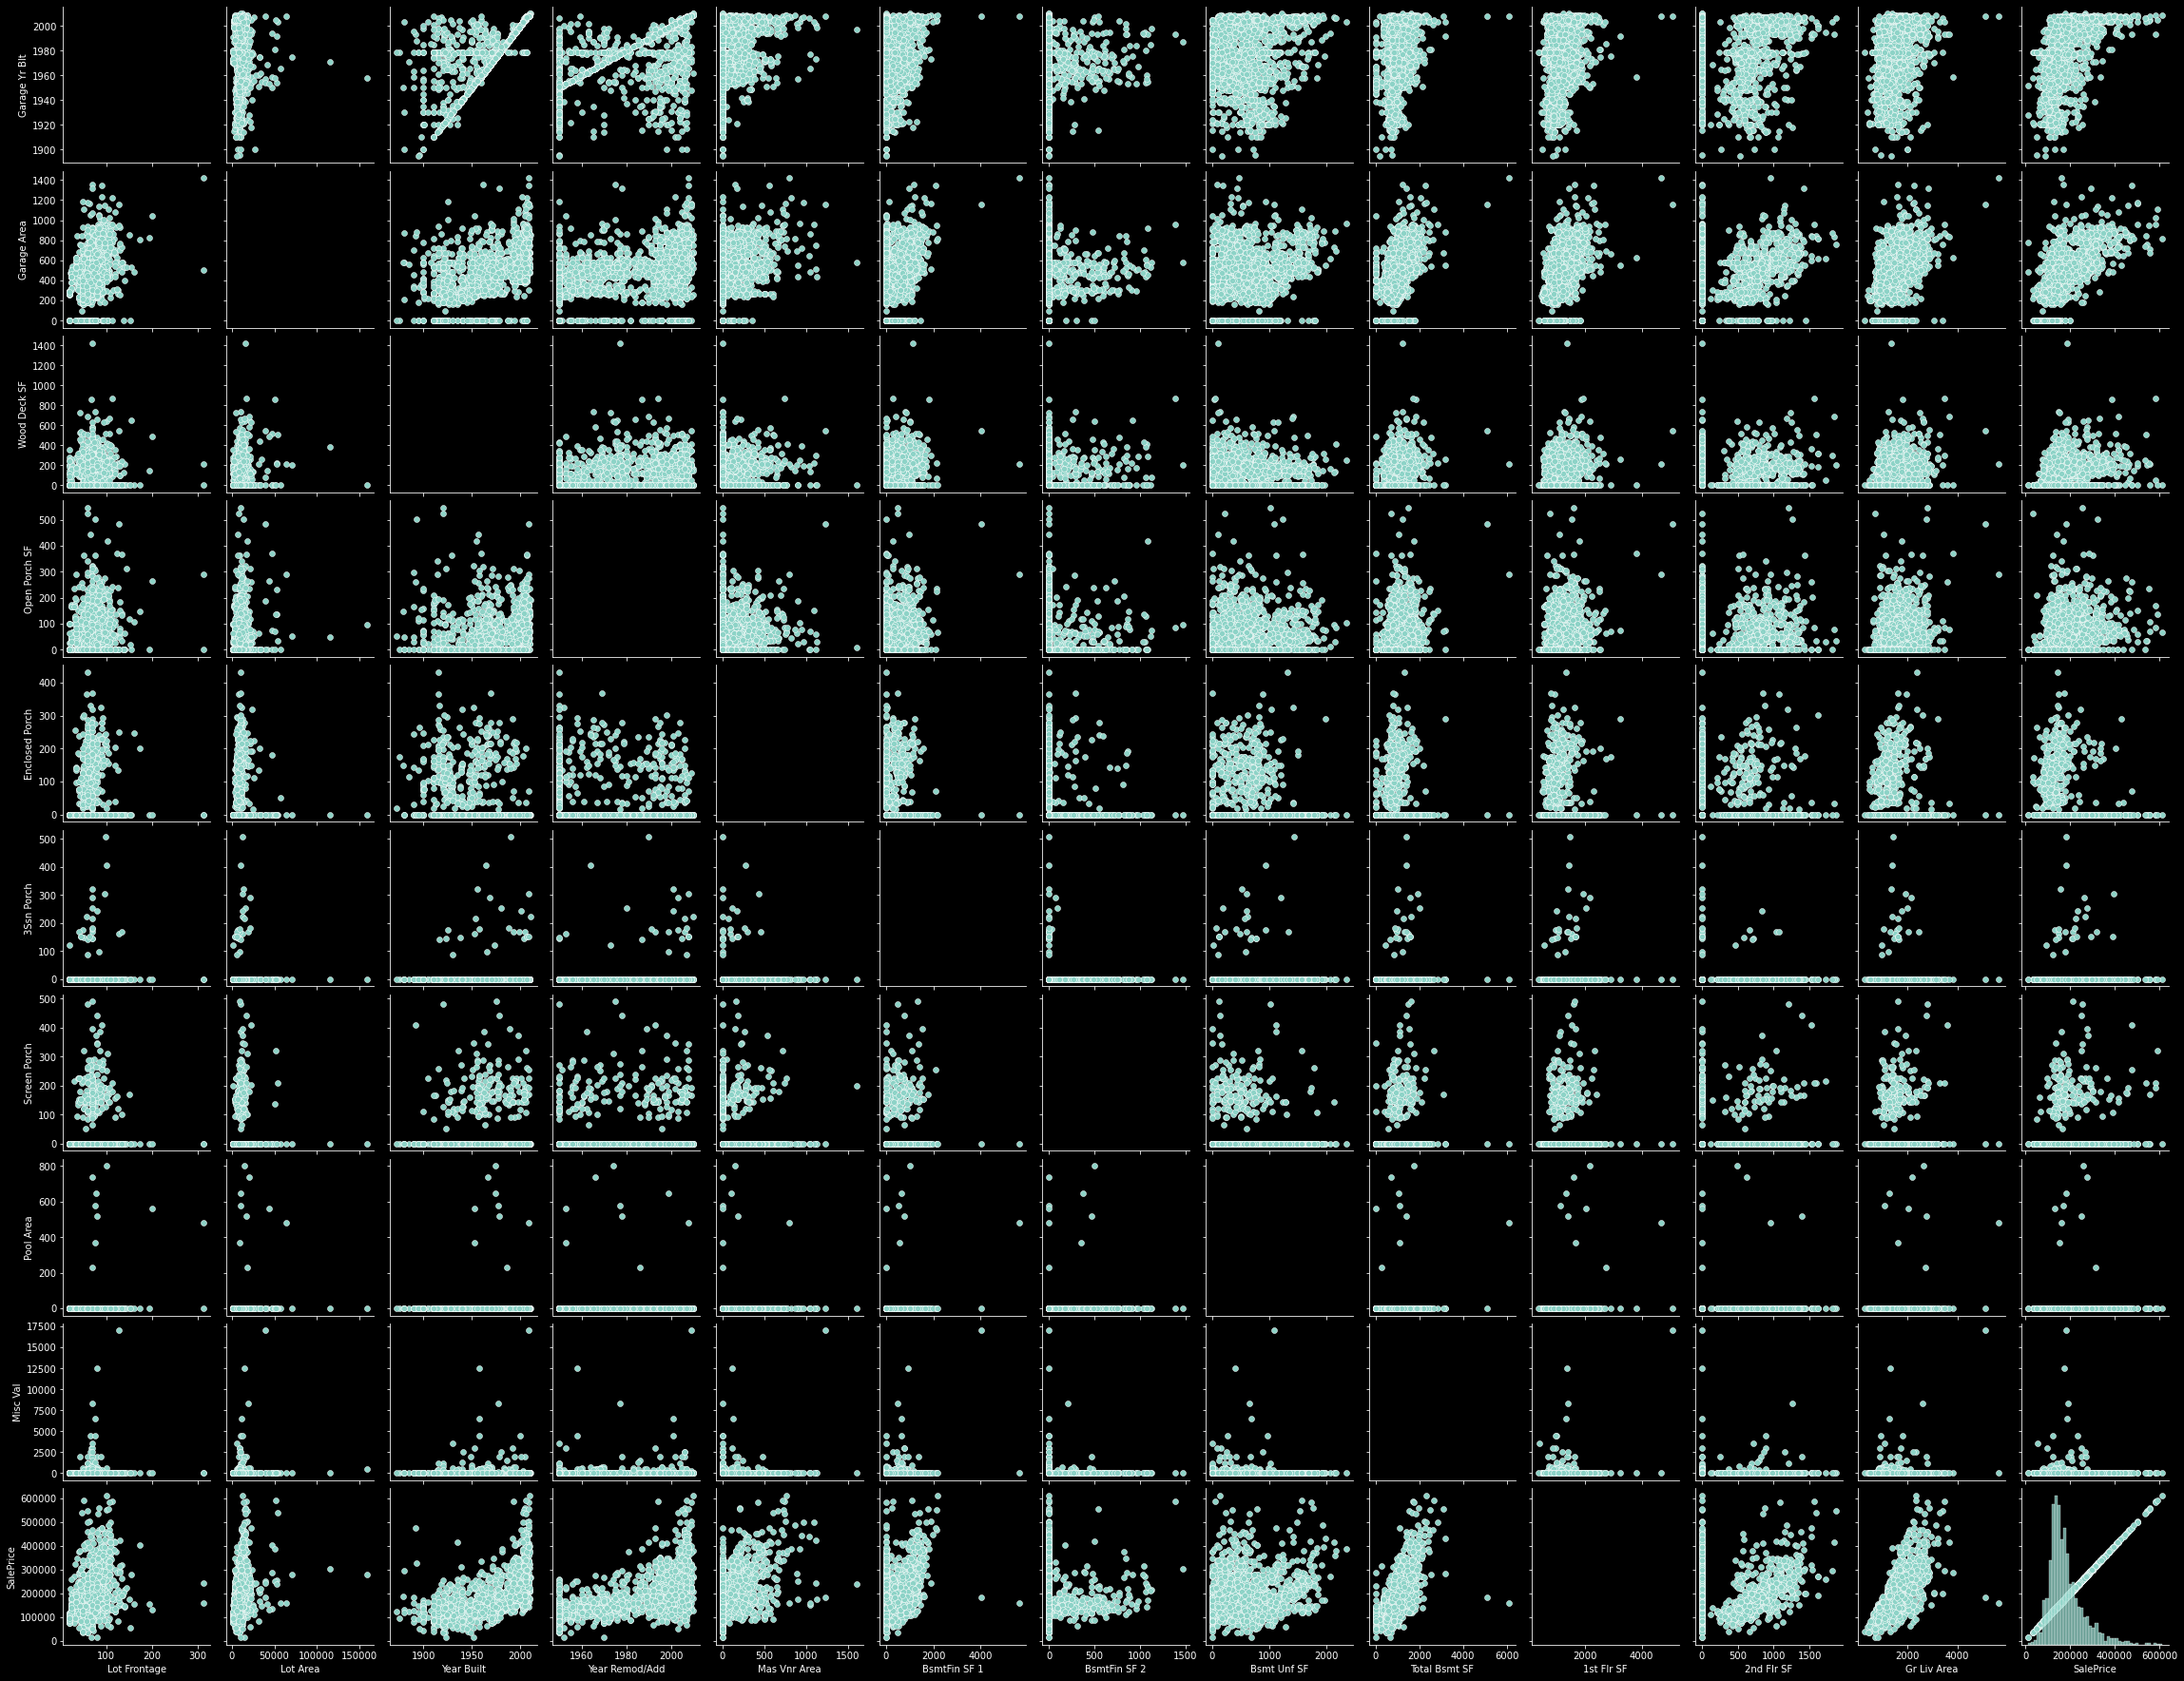

In [15]:
sns.pairplot(data=ames, x_vars=xvars, y_vars=yvars);

### Value Counts 

##### Value Counts for some Categorical variables:

_Duplicate to value counts in in `data_clean_preprocessing` notebook._

In [16]:
cat_features = ['MS SubClass', 'MS Zoning', 'Alley', 'Street', 'Lot Shape', 'Land Contour', 'Utilities', 'Lot Config', 'Land Slope', 'Neighborhood',\
                'Bsmt Exposure', 'Foundation', 'Bsmt Cond', 'Heating', 'Central Air', 'Electrical', 'Kitchen AbvGr', 'Kitchen Qual', 'Paved Drive', 'Fence',\
               'Misc Feature', 'Mo Sold', 'Sale Type']

nl = '\n'
for feature in cat_features: 
    print(f'Value Counts for {feature.upper()}:{nl}{ames[feature].value_counts()}')

Value Counts for MS SUBCLASS:
20     769
60     394
50     198
120    132
30     101
70      89
160     88
80      86
90      75
190     46
85      28
75      16
45      11
180     11
40       4
150      1
Name: MS SubClass, dtype: int64
Value Counts for MS ZONING:
RL         1598
RM          314
FV          101
C (all)      19
RH           14
A (agr)       2
I (all)       1
Name: MS Zoning, dtype: int64
Value Counts for ALLEY:
Grvl    85
Pave    55
Name: Alley, dtype: int64
Value Counts for STREET:
Pave    2042
Grvl       7
Name: Street, dtype: int64
Value Counts for LOT SHAPE:
Reg    1294
IR1     691
IR2      55
IR3       9
Name: Lot Shape, dtype: int64
Value Counts for LAND CONTOUR:
Lvl    1841
HLS      85
Bnk      80
Low      43
Name: Land Contour, dtype: int64
Value Counts for UTILITIES:
AllPub    2047
NoSewr       1
NoSeWa       1
Name: Utilities, dtype: int64
Value Counts for LOT CONFIG:
Inside     1502
Corner      348
CulDSac     131
FR2          60
FR3           8
Name: Lot Co

In [17]:
nulls = pd.DataFrame(ames.isnull().sum())
nulls

,0
Id,0
PID,0
MS SubClass,0
MS Zoning,0
Lot Frontage,0
...,...
garage_large,0
garage_nice,0
garage_RFn,0
garage_Unf,0


In [18]:
nulls_count = nulls[nulls[0]!=0]
nulls_count

,0
Alley,1909
Mas Vnr Type,22
Bsmt Qual,54
Bsmt Cond,54
Bsmt Exposure,57
BsmtFin Type 1,54
BsmtFin Type 2,55
Bsmt Full Bath,1
Bsmt Half Bath,1
Fireplace Qu,998


### EDA w/ Plots 

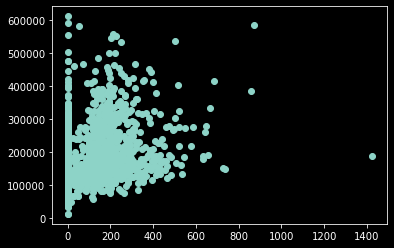

In [19]:
plt.scatter(ames['Wood Deck SF'], ames['SalePrice'])